District Classification 

This problem is a classification problem where we have latitude and longitude of the hotel and we
have to predict the hotel is in which district out of three unique districts.



In [1]:
#Importing Numpy for matrix multiplication


import numpy as np

In [2]:
#Importing pandas for reading our data


import pandas as pd

In [3]:
#Getting our data using pandas inbuilt function read_csv


dataframe = pd.read_csv("/home/bhush/Documents/hotel.csv")

#The pandas function head helps printing the first five instances of dataframe

dataframe.head()

,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan


In [4]:
# Getting the unique values from the district column because it is the variable we have to classify 
# from given inputs

dataframe['district'].unique()

array(['Beitou', 'Zhongshan', 'Xinyi'], dtype=object)

In [5]:
# Getting the LabelEncoder from sklearn to encode the string value to numbers for better classification

from sklearn.preprocessing import LabelEncoder

In [6]:
# Applyting label encoder to our data so that we can transform it.


Lb = LabelEncoder()
dataframe['district'] = Lb.fit_transform(dataframe['district'])

In [7]:
# After encoding the data you can see the values in district column have been replaced by their
# respective int values


dataframe.head()


#Here 0 represents Beitou
# 1 represents Xinyi
# 2 represents Zhongshan

,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,0
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,2
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),0
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,1
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,2


In [8]:
# Here we make use of 'unique' function from the numpy library to print the unique values in
# district column with the count


unique , counts = np.unique(dataframe['district'],return_counts=True)
print(unique,counts)

[0 1 2] [18 13 71]


In [9]:
dataframe['district'].unique()

array([0, 2, 1])

In [10]:
#By using .values after dataframe we convert dataframe object to a numpy array
# The input variables  

X = dataframe.iloc[:,1:3].values

# Getting first five instances of X

print(X[0:5,:])

[[ 25.137793 121.51495 ]
 [ 25.057854 121.52409 ]
 [ 25.137163 121.50544 ]
 [ 25.039248 121.56741 ]
 [ 25.052057 121.52831 ]]


In [11]:
# The variable that will be predicted i.e result 

Y = dataframe['district'].values
print(Y[0:5])

[0 2 0 1 2]


In [12]:
# Splitting data into training data and testing data using train_test_split



from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,shuffle=False)

In [13]:
# Getting the first five instances of X_train

print(X_train[0:5,:])

[[ 25.137793 121.51495 ]
 [ 25.057854 121.52409 ]
 [ 25.137163 121.50544 ]
 [ 25.039248 121.56741 ]
 [ 25.052057 121.52831 ]]


In [14]:
#Getting the first five instancess of Y_train

Y_train[0:5]

array([0, 2, 0, 1, 2])

In [15]:
# Getting our Classifier KNeighbors which stands for K nearest neighbors.
# As this is a classification problem we used KNN , we can also use logistic regression , SVM etc 
# We can also use Neural Networks for this type of problem.


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

In [16]:
#Training our model fitting the data


classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
# Getting the accuracy score for training data

classifier.score(X_train,Y_train)

1.0

In [18]:
# Getting the accuracy score for testing data


classifier.score(X_test,Y_test)

1.0

In [19]:
# We are using cross validation here to get accuracy for different percentages of train,test data
# Split


from sklearn.model_selection import cross_val_score
results = cross_val_score(classifier,X,Y,cv=5)
print(results)

[1. 1. 1. 1. 1.]


In [20]:
#Predicting a random value from the dataset

classifier.predict([[25.137793,121.51495]])

array([0])

In [21]:
classifier.predict([[25.039248,121.56741]])

array([1])

Text(0, 0.5, 'Lon')

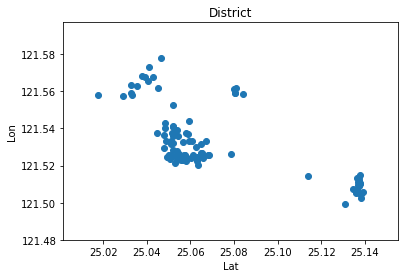

In [33]:
#Plotting the scatter plot for the input variables


import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.title('District')
plt.xlabel('Lat')
plt.ylabel('Lon')

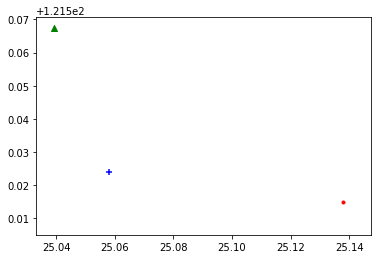

In [39]:
# Plotting a scatter plot for unique values of district


plt.scatter(25.137793,121.51495,marker='.',color='red')   #Beitou
plt.scatter(25.057854,121.52409,marker='+',color='blue')  #Zhongshan
plt.scatter(25.039248,121.56741,marker='^',color='green') #Xinyi